In [1]:
# First, import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [2]:
# Generate random signal
x = np.random.randn(300)

# Calculate Fast Fourier Transform
xfft = np.abs(fft(x,1024))
xfft = xfft[0:512]



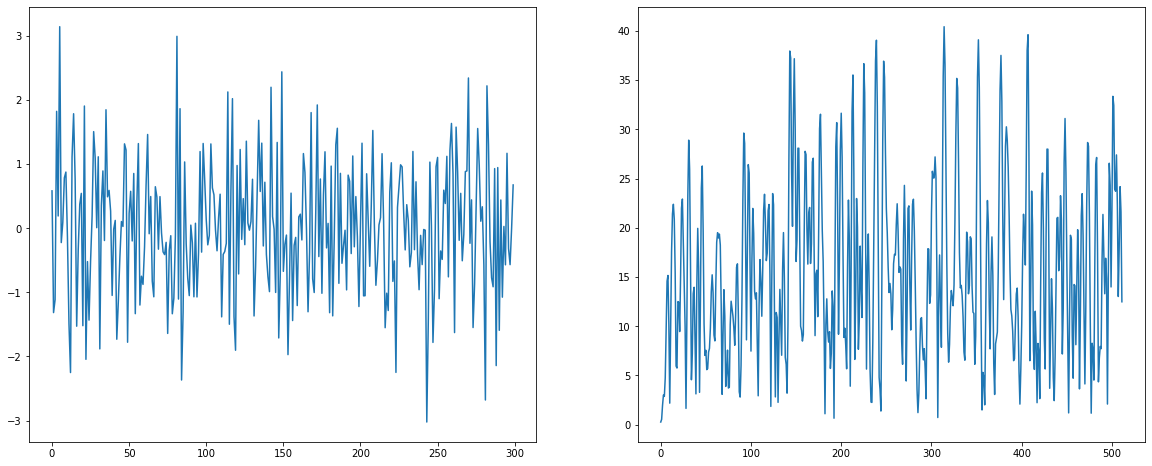

In [3]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(range(300),x)
plt.subplot(1,2,2)
plt.plot(range(512),xfft)

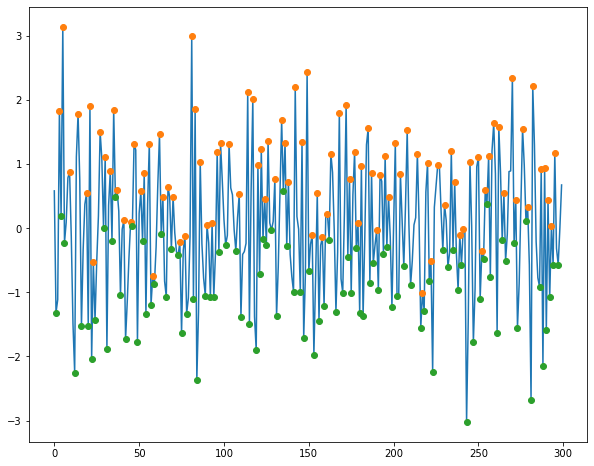

In [4]:
upper_peaks, _ = find_peaks(x)
lower_peaks, _ = find_peaks(-x)


plt.figure(figsize = (10,8))
plt.plot(range(300),x)
plt.plot(upper_peaks,x[upper_peaks],'o')
plt.plot(lower_peaks,x[lower_peaks],'o')

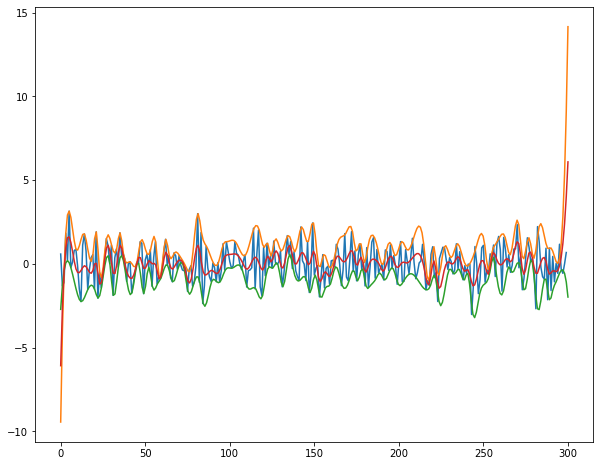

In [7]:
f1 = interp1d(upper_peaks,x[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks,x[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(range(300))
y2 = f2(range(300))

avg_envelope = (y1 + y2) / 2
imf1 = avg_envelope

x_axis = np.linspace(0,300,len(y1))

plt.figure(figsize = (10,8))
plt.plot(range(300),x)
plt.plot(x_axis,y1)
plt.plot(x_axis,y2)
plt.plot(x_axis,avg_envelope)



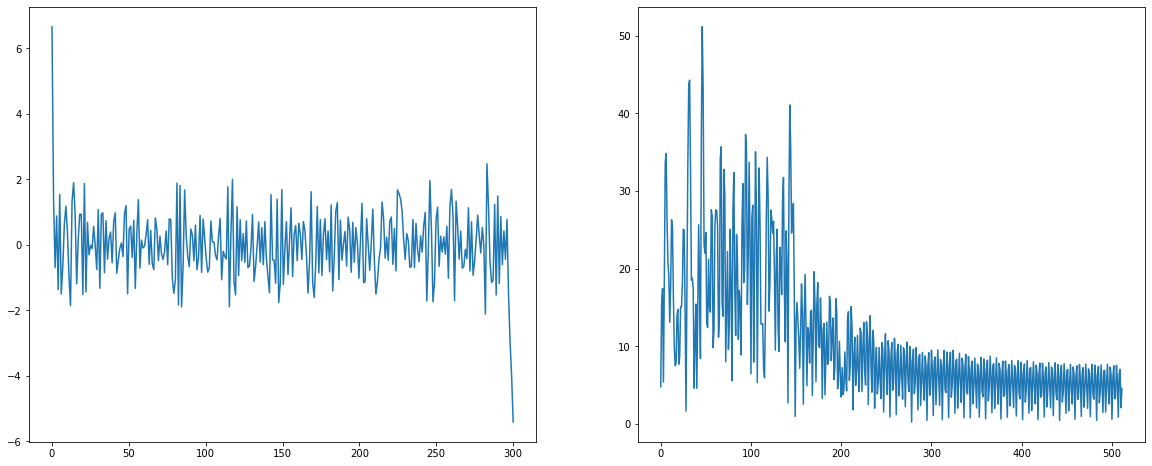

In [9]:
res1 = x - imf1

# Calculate Fast Fourier Transform
xfft = np.abs(fft(imf1,1024))
xfft = xfft[0:512]

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(x_axis,res1)
plt.subplot(1,2,2)
plt.plot(range(512),xfft)
